(sec:visualization_3)=
# 판다스 시각화 도구

In [1]:
import numpy as np
import pandas as pd

In [2]:
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
pd.options.display.max_columns = 20

In [3]:
np.random.seed(12345)
np.set_printoptions(precision=4, suppress=True)

In [4]:
import matplotlib.pyplot as plt
import matplotlib

In [5]:
plt.rc("figure", figsize=(10, 6))

`datetime.datetime` 자료형은 시간(날짜) 데이터를 다룬다.

In [6]:
from datetime import datetime

**주요 내용**

판다스의 시리즈(Series)와 데이터프레임(Dataframe) 객체 모두 `plot()` 메서드를 지원한다. 
실제로는 `matplotlib.pyplot.plot()`을 이용하기에 `xticks`, `xlim` 등 옵션 사용방식 또한 거의 동일하다.
자세한 옵션과 사용법은 공식문서를 참고한다. 

- [`pandas.Seris.plot()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html)
- [`pandas.DataFrame.plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

## 시리즈 시각화

### 선 그래프

시리즈는 하나의 선그래프를 그릴 수 있으며, 항목이 y축 좌표로, 인덱스가 x축 좌표로 사용된다.

In [7]:
s = pd.Series(np.random.standard_normal(10).cumsum(), index=np.arange(0, 100, 10))
s

0    -0.204708
10    0.274236
20   -0.245203
30   -0.800933
40    1.164847
50    2.558253
60    2.651161
70    2.932907
80    3.701930
90    4.948364
dtype: float64

<Axes: >

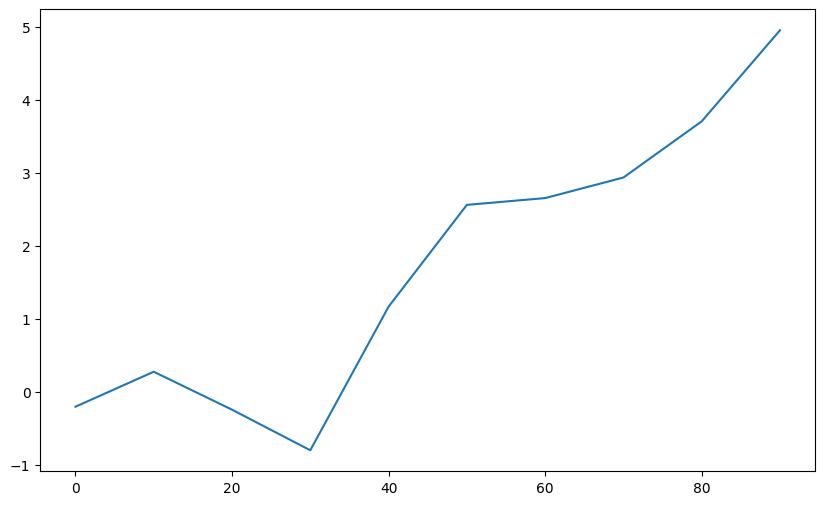

In [8]:
s.plot()

시리즈/데이터프레임의 `plot()` 메서드의 `style` 키워드 인자는 
`plt.plot()` 함수의 `linestyle` 키워드 인자와 동일한 기능을 수행한다.

<Axes: >

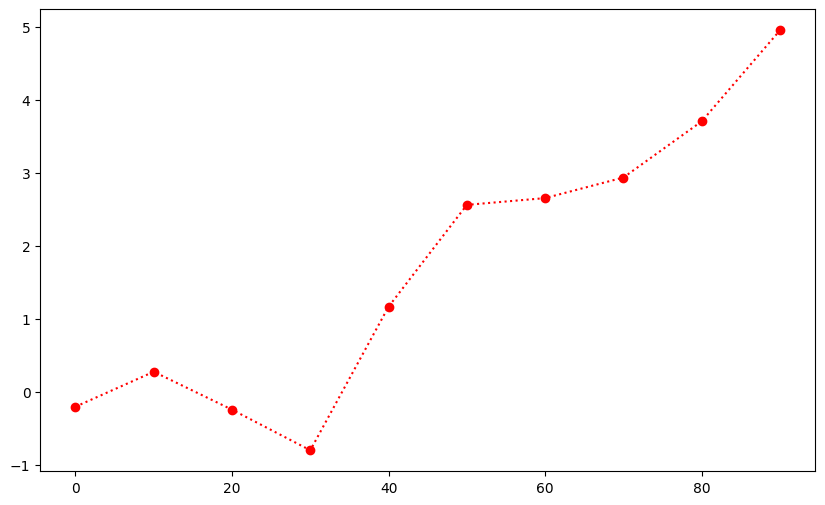

In [9]:
s.plot(style='o:r')

### 막대그래프

- 수직 막대그래프: `pandas.Series.plot.bar()`
- 수평 막대그래프: `pandas.Series.plot.barh()`

아래 코드는 시리즈를 이용한 수직/수평 막대그래프를 그리는 기본적인 방법을 보여준다.
수평 막대그래프의 x축/y축 눈금은 수직 막대그래프의 y축/x축 눈금에 해당한다.

In [10]:
np.random.seed(12345)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))

In [11]:
data

a    0.929616
b    0.316376
c    0.183919
d    0.204560
e    0.567725
f    0.595545
g    0.964515
h    0.653177
i    0.748907
j    0.653570
k    0.747715
l    0.961307
m    0.008388
n    0.106444
o    0.298704
p    0.656411
dtype: float64

참고: 서브플롯을 지정하려면 `ax=서브플롯` 옵션을 지정하면 되며, 이는 시리즈와 데이터프레임의
모든 그래프 함수에 사용된다.
아래 데이터는 (2,1) 모양의 `Figure` 객체에 포함된 두 개의 서브플롯에 각각 수직/수평 막대그래프를 삽입한다.

<Axes: >

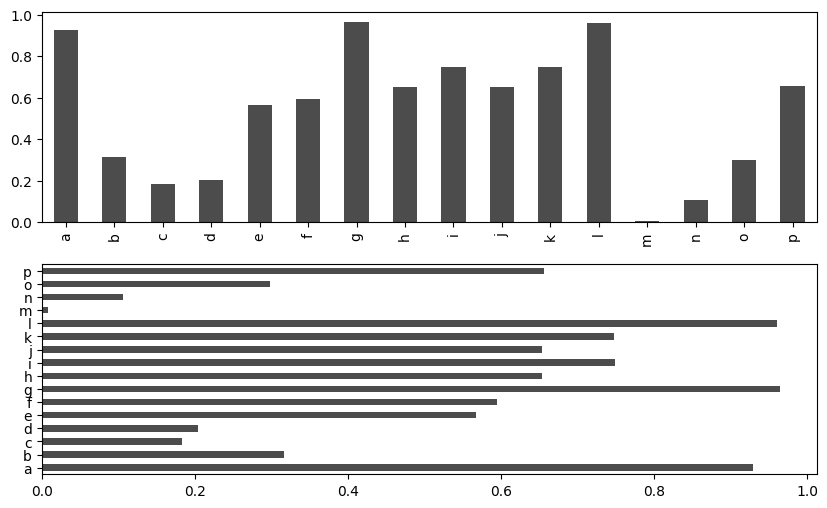

In [12]:
fig, axes = plt.subplots(2, 1)

data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

- plot() 메서드의 `kind=bar`와 `kind=barh` 옵션: `kind=bar`/`kind=barh` 옵션이 각각 수직/수평 막대그래프를 그리는 함수와 동일하다.

<Axes: >

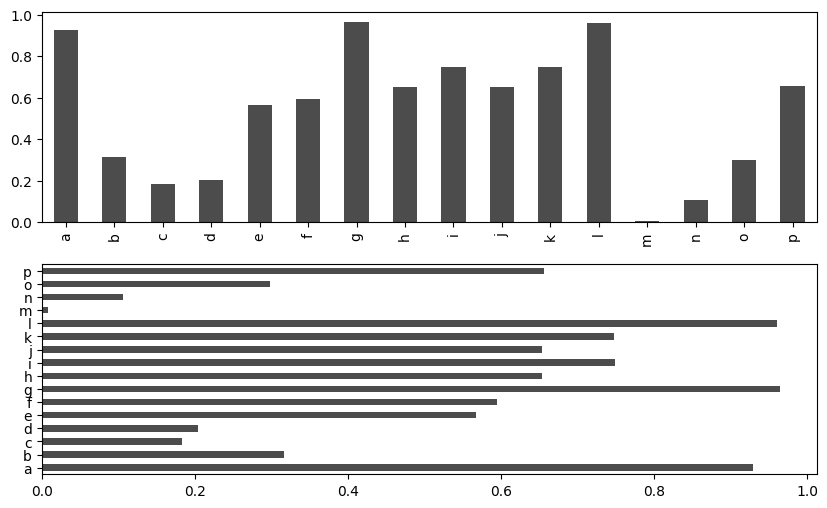

In [13]:
fig, axes = plt.subplots(2, 1)

data.plot(ax=axes[0], kind='bar', color='k', alpha=0.7)
data.plot(ax=axes[1], kind='barh', color='k', alpha=0.7)

## 데이터프레임 시각화

### 데이터프레임과 선 그래프

데이터프레임은 특성 수만큼의  선그래프를 그릴 수 있다.
y축 좌표는 특성별 항목이며, x축 좌표는 기본적으로 인덱스가 사용된다.
또한 특성 이름이 범례로 지정된다.

In [14]:
df = pd.DataFrame(np.random.standard_normal((10, 4)).cumsum(0),
                  columns=["A", "B", "C", "D"],
                  index=np.arange(0, 100, 10))
df

,A,B,C,D
0,0.274992,0.228913,1.352917,0.886429
10,-1.726646,-0.142930,3.021942,0.447860
20,-2.266387,0.334055,6.270886,-0.573368
30,-2.843474,0.458177,6.573500,-0.049596
40,-2.842534,1.801986,5.859956,-0.880749
50,-5.212766,-0.058774,4.999198,-0.320604
60,-6.478700,0.061053,3.935686,0.012279
70,-8.838119,-0.138490,2.393690,-0.958457
80,-10.145149,0.147860,2.771674,-1.712344
90,-9.813864,1.497602,2.841551,-1.465670


<Axes: >

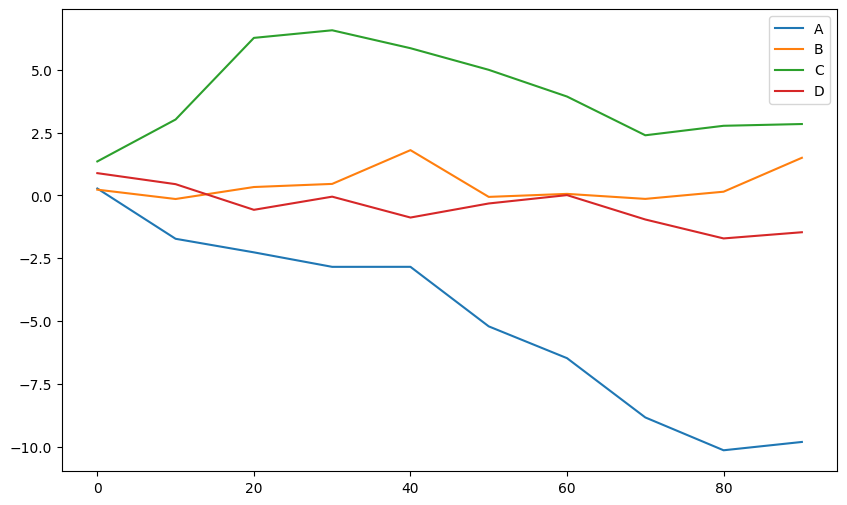

In [15]:
df.plot()

`subplots=True` 키워드 인자를 사용하면 각각의 그래프를 1차원 어레이 모양의 독립된 서브플롯에서 그린다.

In [16]:
np.random.seed(12345)
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df

,A,B,C,D
0,-0.204708,0.478943,-0.519439,-0.555730
10,1.761073,1.872349,-0.426531,-0.273984
20,2.530095,3.118784,0.580659,-1.570205
30,2.805087,3.347697,1.933575,-0.683776
40,0.803450,2.975854,3.602601,-1.122346
50,0.263708,3.452839,6.851545,-2.143573
60,-0.313379,3.576961,7.154158,-1.619801
70,-0.312439,4.920770,6.440614,-2.450955
80,-2.682670,3.060010,5.579857,-1.890809
90,-3.948605,3.179837,4.516344,-1.557927


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

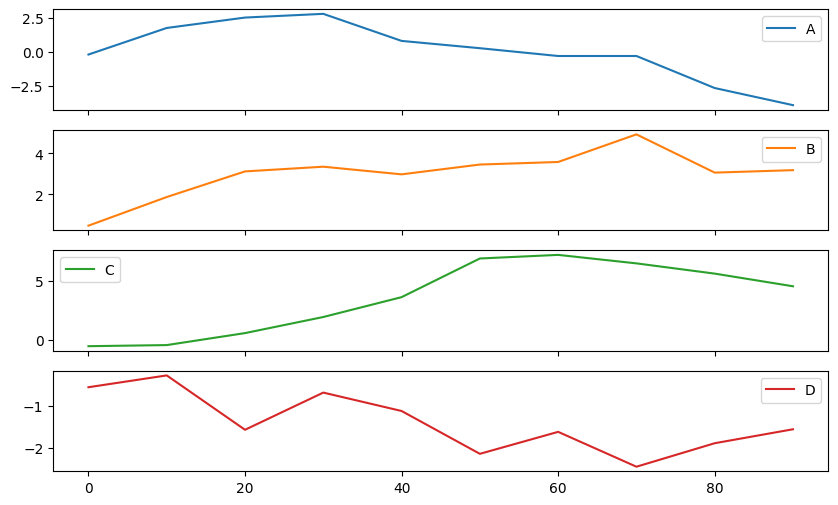

In [17]:
df.plot(subplots=True)

### 데이터프레임과 막대그래프

- 수직 막대그래프: `pandas.DataFrame.plot.bar()`
- 수평 막대그래프: `pandas.DataFrame.plot.barh()`

아래 코드는 데이터프레임을 이용한 수직/수평 막대그래프를 그리는 기본적인 방법을 보여준다.
수평 막대그래프의 x축/y축 눈금은 수직 막대그래프의 y축/x축 눈금에 해당한다.

- 범례 제목: 컬럼 인덱스의 이름이 주어진 경우 사용된다. 아래 코드에서는 Genus이다. 
- 행별 막대그래프를 하나로 묶어서 보여준다.

In [18]:
np.random.seed(12348)

df = pd.DataFrame(np.random.uniform(size=(6, 4)),
                  index=["one", "two", "three", "four", "five", "six"],
                  columns=pd.Index(["A", "B", "C", "D"], name="Genus"))
df

Genus,A,B,C,D
one,0.370670,0.602792,0.229159,0.486744
two,0.420082,0.571653,0.049024,0.880592
three,0.814568,0.277160,0.880316,0.431326
four,0.374020,0.899420,0.460304,0.100843
five,0.433270,0.125107,0.494675,0.961825
six,0.601648,0.478576,0.205690,0.560547


<Axes: >

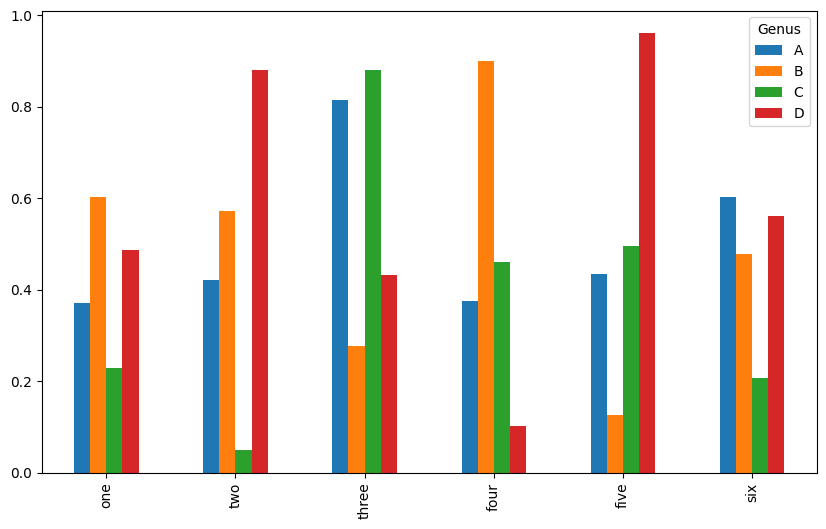

In [19]:
df.plot.bar()

<Axes: >

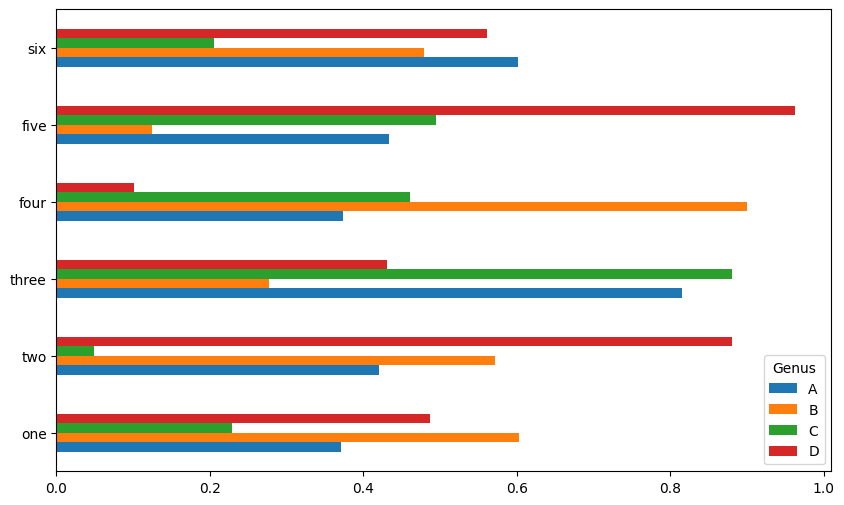

In [20]:
df.plot.barh()

**누적막대그래프**

`stacked=True` 옵션을 사용하면 각 행의 값들이 하나의 막대에 누적되어 출력된다.

<Axes: >

<Figure size 1000x600 with 0 Axes>

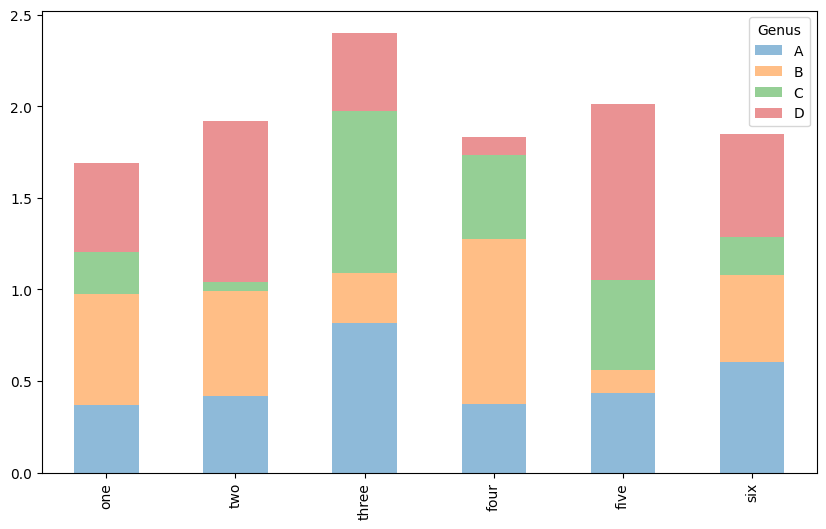

In [21]:
plt.figure()

df.plot.bar(stacked=True, alpha=0.5)

<Axes: >

<Figure size 1000x600 with 0 Axes>

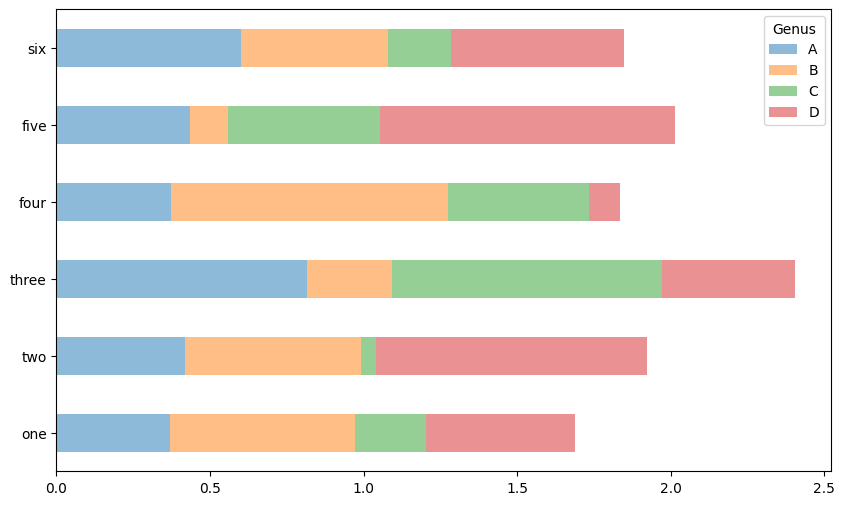

In [22]:
plt.figure()

df.plot.barh(stacked=True, alpha=0.5)

- plot() 메서드의 `kind=bar`와 `kind=barh` 옵션: 
    `kind=bar`/`kind=barh` 옵션이 각각 수직/수평 막대그래프를 그리는 함수와 동일하다.

<Axes: >

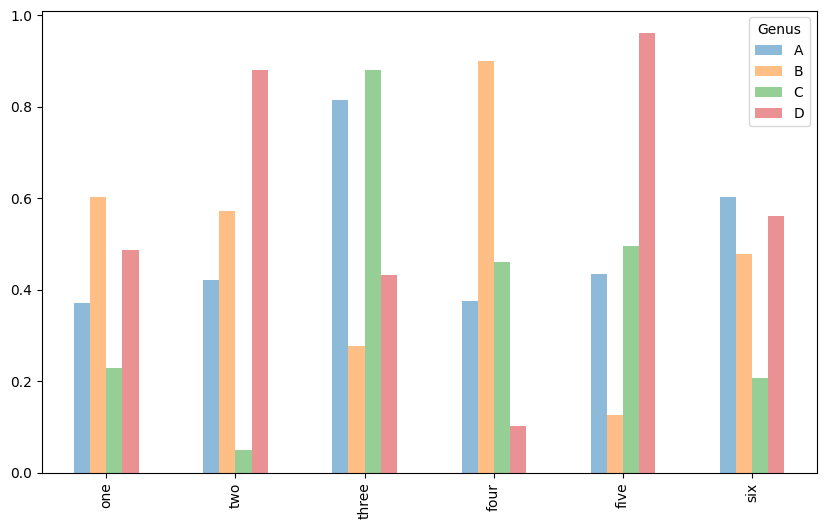

In [23]:
df.plot(kind='bar', alpha=0.5)

<Axes: >

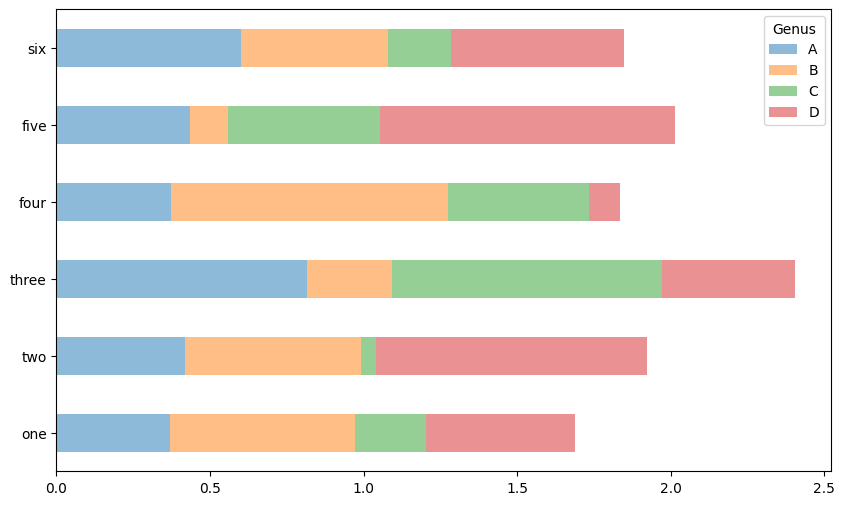

In [24]:
df.plot(kind='barh', stacked=True, alpha=0.5)

**그래프 스타일 변환**

판다스의 시각화 도구는 `matplotlib.pyplot` 라이브러리를 이용한다.
따라서 `matplotlib.pyplot`와 동일한 방식으로 그래프 스타일을 변경할 수 있다.
예를 들어 아래 코드를 실행하면 흑백으로 그래프를 그린다.

In [25]:
plt.style.use('grayscale')

<Axes: >

<Figure size 1000x600 with 0 Axes>

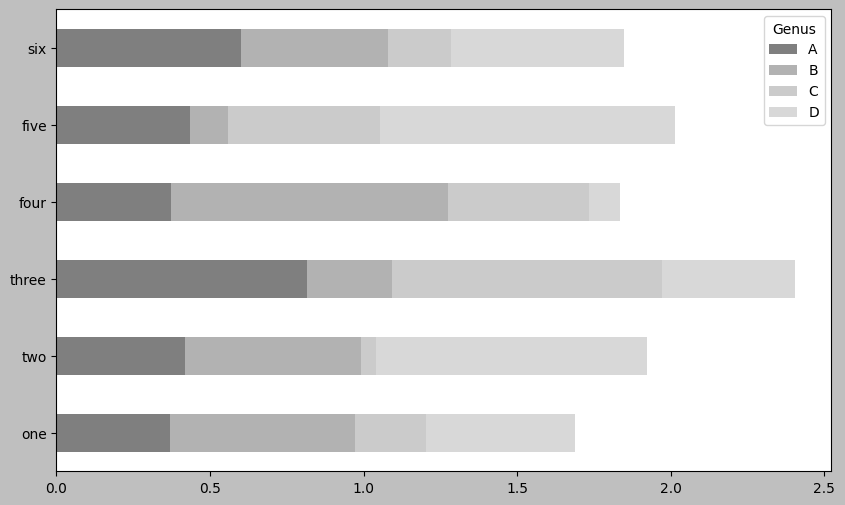

In [26]:
plt.figure()

df.plot.barh(stacked=True, alpha=0.5)

**예제: 서빙 팁 데이터**

서빙 팁 데이터는 어떤 식당에서 일주일 동안 올린 수입 내역을 담고 있다.

In [27]:
tips_path = 'https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/examples/tips.csv'

In [28]:
tips = pd.read_csv(tips_path)

tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


총 244개의 데이터 샘플을 담고 있으며, 열별 라벨(특성)이 의미하는 바는 다음과 같다.

- `total_bill`: 총 수입
- `tip`: 서빙 팁 수입
- `smoker`: 테이블 손님 흡연 여부 
- `day`: 요일
- `time`: 시간대(점심/저녁)
- `size`: 테이블 손님 수

범주형 데이터에 사용된 값들은 다음과 같다.

* 흡연 여부: 비흡연, 흡연

In [29]:
tips['smoker'].unique()

array(['No', 'Yes'], dtype=object)

* 요일: 일, 토, 목, 금

In [30]:
tips['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

* 시간대: 저녁, 점식

In [31]:
tips['time'].unique()

array(['Dinner', 'Lunch'], dtype=object)

- 테이블 인원스: 1명에서 6명 사이

In [32]:
tips['size'].unique()

array([2, 3, 4, 1, 6, 5])

- 요일과 테이블 당 손님 수 사이의 관계

요일(`day`)과 테이블 당 손님 수(`size`) 사이의 관계를 파악하기 위해 교차표를 이용한다.
`pandas.crosstab()` 함수는 지정된 두 특성 사이의 도수분포도를 표로 생성한다.

In [33]:
party_counts = pd.crosstab(tips['day'], tips['size'])

party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


빈도가 낮은 1인과 6인 테이블은 제외한다.

In [34]:
party_counts = party_counts.loc[:, 2:5]

party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [35]:
party_counts = party_counts.reindex(index=["Thur", "Fri", "Sat", "Sun"])
party_counts

size,2,3,4,5
day,,,,
Thur,48,4,5,1
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3


- 행별 정규화(Normalization)

행별로 항목의 합이 1이 되도록 값을 정규화한다.
이를 통해 요일별 테이블 당 손님 수의 비율을 보다 정확히 파악할 수 있다.

- `pd.div()` 함수: 항목별 나눗셈. `axis=0`는 행별 나눗셈.
- `sum()` 메서드: 행/열별 합 계산. 기본은 열별 합 계산(`axis=0`). 행별 합은 `axis=1` 지정.

In [36]:
# 각 행의 합이 1이 되도록 정규화
row_sum = party_counts.sum(axis=1)
party_pcts = party_counts.div(row_sum, axis=0)

party_pcts

size,2,3,4,5
day,,,,
Thur,0.827586,0.068966,0.086207,0.017241
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000


요일별 테이블당 손님 수를 막대그래프로 그리면 다음과 같다.
주말일 수록 테이블 당 손님 수가 많아짐을 확인할 수 있다.

<Axes: xlabel='day'>

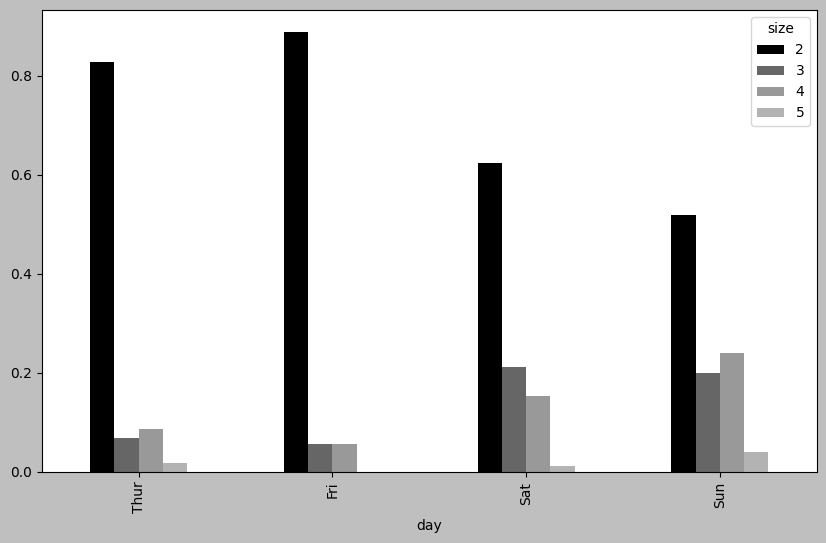

In [37]:
party_pcts.plot.bar()

<Axes: xlabel='day'>

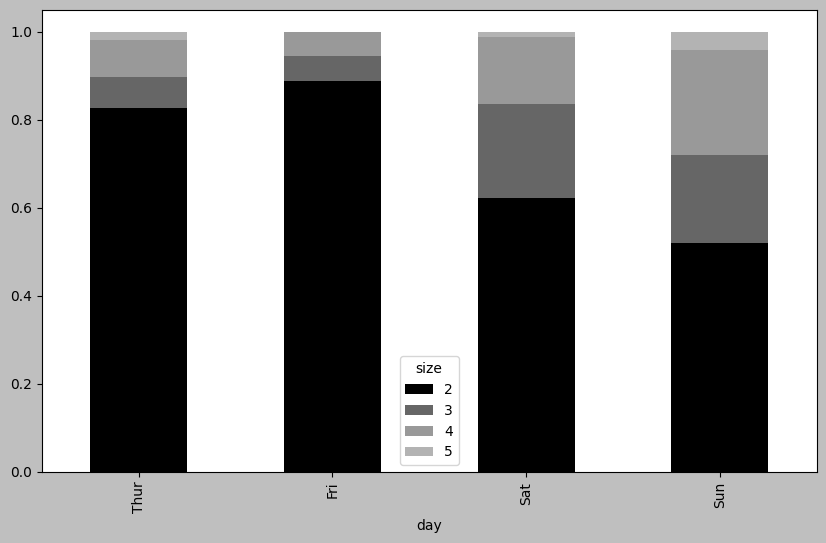

In [38]:
party_pcts.plot.bar(stacked=True)

seaborn 스타일로 변환한다.

In [39]:
plt.style.use('seaborn-v0_8')

<Axes: ylabel='day'>

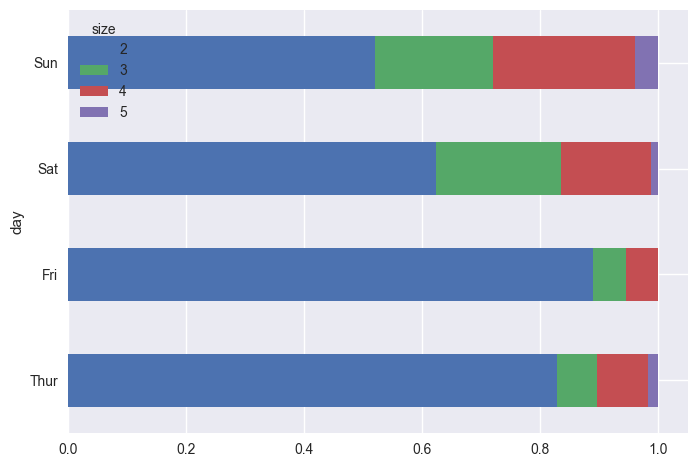

In [40]:
party_pcts.plot.barh(stacked=True)

## 주석 추가

이미지에 설명, 화살표 등 다양한 주석을 추가할 수 있다.

설명을 위해 S&P 500 (스탠다드 앤 푸어스, Standard and Poor's 500)의 미국 500대 기업을 포함한 
주식시장지수 데이터로 그래프를 생성하고 2007-2008년 사이에 있었던 
재정위기와 관련된 중요한 날짜를 주석으로 추가한다.

In [41]:
base_url = 'https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/examples/'

In [42]:
data = pd.read_csv(base_url+"spx.csv")
data

,Unnamed: 0,SPX
0,1990-02-01 00:00:00,328.79
1,1990-02-02 00:00:00,330.92
2,1990-02-05 00:00:00,331.85
3,1990-02-06 00:00:00,329.66
4,1990-02-07 00:00:00,333.75
...,...,...
5467,2011-10-10 00:00:00,1194.89
5468,2011-10-11 00:00:00,1195.54
5469,2011-10-12 00:00:00,1207.25
5470,2011-10-13 00:00:00,1203.66


0번 열이 시간 데이터를 담고 있기에 파일에서 불러올 때 아예 0번 열을 인덱스로
지정한다. 또한 시간의 흐름 정보를 최대한 활용하기 위해 문자열이 아닌 시계열 데이터로 불러온다.
이 모든 것을 `pd.read_csv()` 함수의 키워드 인자 지정으로 가능하다.

- `index_col=0`: 0번 열을 인덱스 지정.
- `parse_dates=True`: 년월일까지 구분해서 인덱스로 사용하도록 함. 기본값은 `False`.

In [43]:
data = pd.read_csv(base_url+"spx.csv", index_col=0, parse_dates=True)
data

,SPX
1990-02-01,328.79
1990-02-02,330.92
1990-02-05,331.85
1990-02-06,329.66
1990-02-07,333.75
...,...
2011-10-10,1194.89
2011-10-11,1195.54
2011-10-12,1207.25
2011-10-13,1203.66


하나의 열만 존재하는 데이터프레임이기에 시리즈로 변환한다.

__참고:__ 반드시 필요한 과정은 아니다. `spx` 대신 `data`를 그대로 사용해도 동일하게 작동한다.

In [44]:
spx = data['SPX']
spx

1990-02-01     328.79
1990-02-02     330.92
1990-02-05     331.85
1990-02-06     329.66
1990-02-07     333.75
               ...   
2011-10-10    1194.89
2011-10-11    1195.54
2011-10-12    1207.25
2011-10-13    1203.66
2011-10-14    1224.58
Name: SPX, Length: 5472, dtype: float64

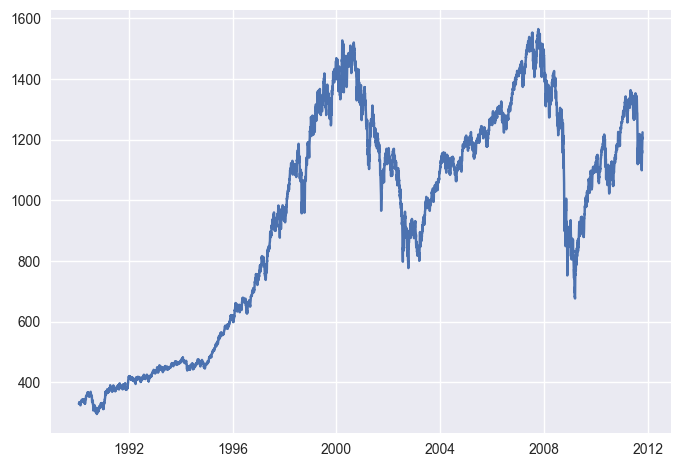

In [45]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(spx)

우리나라에서 IMF 사태가 벌어진 이유 중에 하나인
2007-2008년 세계적 금융위기가 시작한 지점을 아래 내용으로 그래프에 주석으로 추가하려 한다.

- 2007년 10월 11일: 주가 강세장 위치
- 2008년 3월 12일: 베어스턴스 투자은행 붕괴
- 2008년 9월 15일: 레만 투자은행 파산

In [46]:
crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

**`annotate()` 메서드 활용**

- `xy` 속성: 화살표 머리 위치
- `xytext` 속성: 텍스트 위치
- `arrowprops` 속성: 화살표 속성
- `horizontalalignment`: 텍스트 좌우 줄맞춤
- `verticalalignment`: 텍스트 상하 줄맞춤

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

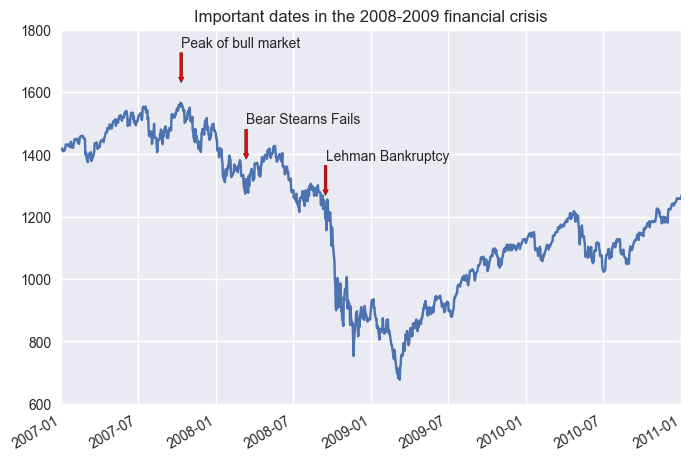

In [47]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

spx.plot(ax=ax, style='-')

for date, label in crisis_data:
    ax.annotate(label, 
                xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='red', headwidth=4, width=2, headlength=4),
                horizontalalignment='left', verticalalignment='top')

# 2007-2010 사이로 확대
ax.set_xlim([datetime(2007, 1, 1), datetime(2011, 1, 1)])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

In [48]:
plt.close('all')